# **🐍 SQL in Python: Querying Data Like a Data Scientist**

Welcome to this crash course on SQL using Python and SQLite!

In this notebook, you'll learn how to write SQL queries in a Python environment, explore data, and understand how SQL fits into your data science toolkit.


## 🧠 **1. But first, what is SQL?**


SQL (Structured Query Language) is a language used to interact with RELATIONAL DATABASES. It allows you to **query**, **filter**, **aggregate**, and **transform** data stored in tables.

The three most important concepts are embedded in the name itself.

1. **Structured**: The data is structured. You work with fields/columns.
2. **Query**: You request information using a text query.
3. **Language**: Guess what, SQL is another programming language!

### 🗒 1.1. What is a relational database(RDB)?

- a way of structuring information in tables with rows(_records_), and columns(_attributes_)
- we establish links (**relationships**) between information by joining tables.
- all tables in a RDB have an attribute known as the *primary key* (a unique identifier of a row)



Think of a database as a collection of Excel sheets (tables), and SQL is how you ask questions about the data

### 1.1.1. A simple RDB
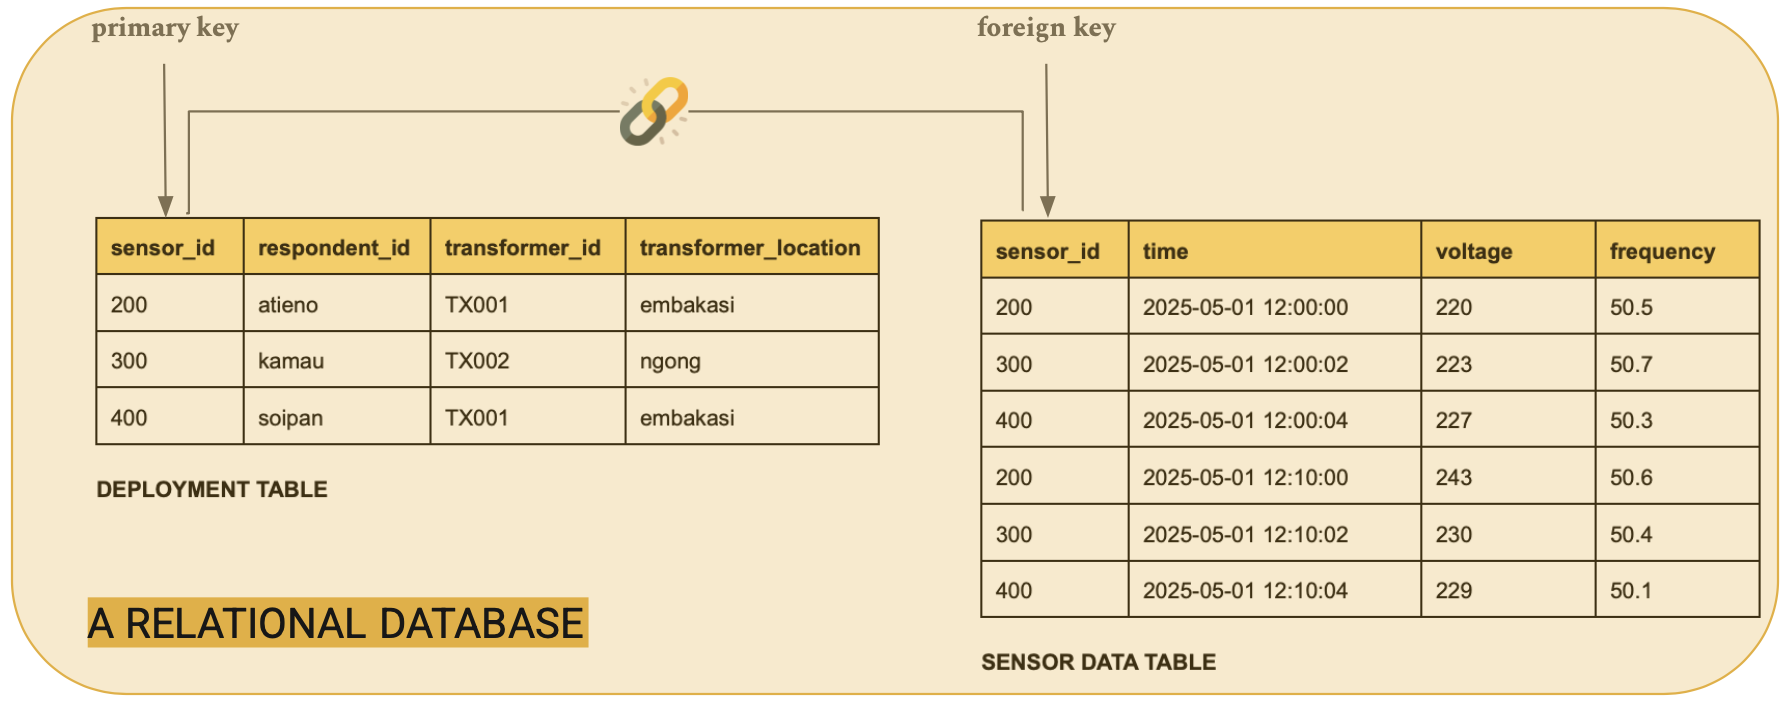

### ⏭ 1.1.2. Examples of RDBs

| **Example**           | **Company/Organization**     | **Proprietary/Open Source** |
|-----------------------|------------------------------|-----------------------------|
| **MySQL**             | Oracle Corporation           | Open-source                 |
| **PostgreSQL**        | PostgreSQL Global Development Group | Open-source                 |
| **SQLite**            | D. Richard Hipp (public domain) | Open-source (*and lightweight*)                |
| **Oracle DB**         | Oracle Corporation           | Proprietary                |
| **Microsoft SQL Server** | Microsoft                   | Proprietary                |
| **IBM Db2**           | IBM                          | Proprietary                |

**We will use [SQLite](https://www.sqlite.org/), since it is the easiest one to set up.**


### 1.1.3. Examples of Non-Relational DBs (for knowledge, not the focus)

| Example                        | Company/Organization                             |
|--------------------------------|--------------------------------------------------|
| MongoDB                        | MongoDB Inc.                                     |
| Cassandra                      | Apache Software Foundation (originated at Facebook) |
| Redis                          | Redis Ltd. (open-source core)                   |
| DynamoDB                       | Amazon Web Services (AWS)                       |
| Couchbase                      | Couchbase Inc.                                   |
| Neo4j                          | Neo4j, Inc.                                      |
| Firebase Realtime DB / Firestore | Google                                          |


### 1.1.4. How do we interact with RDBs? --->CRUD

The most common operations when interacting with a database are often referred to as *CRUD* (Create, Read, Update, Delete).


#### CRUD Breakdown:
| Operation | Description           | SQL Example                                      |
|-----------|-----------------------|--------------------------------------------------|
| CREATE    | Add new data          | `INSERT INTO deployment_table (sensor_id, respondent_id, transformer_id, transformer_location) VALUES (500, 'chelimo','TX003', 'riruta');` |
| READ      | Retrieve data         | `SELECT * FROM sensor_data_table;`                           |
| UPDATE    | Modify existing data  | `UPDATE deployment_table SET transformer_location = 'langata' WHERE sensor_id = 500;` |
| DELETE    | Remove data           | `DELETE FROM sensor_data_table WHERE voltage < '180';`                |


#### Typical usage of CRUD operations by database administrators (DBAs) and data scientists


| CRUD Operation | Database Manager (DBA)                                | Data Scientist                                      |
|----------------|--------------------------------------------------------|-----------------------------------------------------|
| **Create**     | Create tables, schemas, and database structure         | Create temporary tables or views for analysis       |
| **Read**       | **Read data for monitoring and performance**               | **Read data for analysis and modeling**                 |
| **Update**     | Update schema, optimize indexes, manage performance    | Update or clean data for analysis                   |
| **Delete**     | Delete obsolete or sensitive data for maintenance      | Delete data during cleaning or outlier removal      |



## 🗃️ **2. What is SQLite and sqlite3?**

**SQLite** is a lightweight, serverless, self-contained SQL database engine that stores the entire database as a single file on disk. It is perfect for small-scale applications or learning purposes.

sqlite3 is:

- the CLI tool to interact with SQLite databases.
- also the name of the Python module used to connect to and work with SQLite databases in Python.

In Python, we use the `sqlite3` module to:
- create an in-memory database (i.e., one that exists while the notebook is running)
- create tables or load from existing datasets
- run SQL queries directly

### 2.1. Using `slqite3` with `pandas` in Python

Usually, we can use sqlite3 in Python on its own to:


*   create tables
*   insert data
*   write sql queries to get data back

But the results come back as list, with no column names, so it's harder to view or manipulate.

#### This is where `pandas` comes in
`pandas` is a data analysis library in Python. Even though we haven't learnt `pandas` yet, we will use:

```
import pandas as pd

pd.read_sql("your SQL query", connection)
```

And... we will learn about connection and SQL query in the following sections.

#### 🔌 2.1.1. Creating an in-Memory Database Connection

Every time we work with a database using sqlite3 in Python, we need to connect to it first. Think of it like:

> "Opening a channel between your Python code and a database in memory so they can talk."

This connection lets you:

- Create tables
- Insert data
- Run SQL queries
- Save or retrieve data

Without this connection, your SQL code has nowhere to run \\




👇 **Do not change this code**: This sets up the SQL environment in memory

In [ ]:
import sqlite3
import pandas as pd

# Create in-memory database connection
conn = sqlite3.connect(':memory:')

This is a required first step for any SQL interaction in Python
We will be using this connection when calling ```pd.read_sql("your SQL query", *connection*)``` to fetch data

#### ⤴ 2.1.2. Saving a table to the in-memory database

The next step is to save a table to the in-memory database. This table to be saved can either be an existing one or created.

👇 **Do not change this code**: creating the table from scratch

In [ ]:
# Option 1 for step 2: Create a table. This creates an empty table
conn.execute('CREATE TABLE students (id INTEGER, name TEXT, grade INTEGER)')

# Insert some data into the table
conn.execute("INSERT INTO students VALUES (1, 'Alice', 85)")
conn.execute("INSERT INTO students VALUES (2, 'Bob', 90)")
conn.commit()


👇 **Do not change this code**: using `pandas` to load an existing table

In [ ]:
# Option 2 for step 2: Load existing data and save to an SQL table
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')
df.to_sql('tips', conn, index=False, if_exists='replace') # save to SQL table

244

👇 **Do not change this code**: creating a table using `pandas`

In [ ]:
# Option 3 for step 2: Create a pandas dataframe and save to an SQL table
df2 = pd.DataFrame({
    'day': ['Thur', 'Fri', 'Sat', 'Sun'],
    'is_weekend': [0, 0, 1, 1]
})
df2.to_sql('calendar', conn, index=False, if_exists='replace')

4

## **3. SQL Queries**

### 3.1. The **`SELECT`** statement

- Lets you grab whatever you want from a table in the database

```SELECT *```

asterisk **\*** means *all*, i.e., select all columns in the table

#### 3.1.1. `SELECT` statement with `FROM` clause


We know a database has many tables, so we need to specify which table we want to retrieve the data from.


Enter the **FROM** part of the SELECT statement

```SELECT * FROM deployment_table;```

This lets you specify the table you want to retrieve the data from, in this case, the deployment_table is the table name.

*notice the semicolon **\;** at the end of the statement?* <----- SYNTAX

💡💡💡**The SELECT statement will be THE single most most used SQL statement you will experience in your interaction with SQL as a Data Scientist/Analyst**

In [ ]:
# select specific columns
pd.read_sql("SELECT * FROM tips;", conn)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


#### 🔍 3.1.2. SELECT statement with specific columns

We now know that `SELECT * table_name` returns all of the columns in our data table.

However 🛑
You can run into performance problems with this if you are dealing with a very big table or, worse, joining large tables together.

So we want to be a bit more specific in our request.

We **SHOULD** select only the necessary columns, hence we specify the columns of interest:

```
SELECT sensor_id, respondent_id FROM deployment_table;
``

In [ ]:
pd.read_sql(
    """
    SELECT total_bill, tip
    FROM tips;
    """, conn
)

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61
...,...,...
239,29.03,5.92
240,27.18,2.00
241,22.67,2.00
242,17.82,1.75


### 3.2. Filtering rows with the **`WHERE`** clause.

Specifying the columns we want in our SELECT statement lets us limit the **columns** of data we return in our SQL query.

But what if we want to filter the **rows** based on certain criteria?

This is where the **WHERE** clause comes in.

In [ ]:
pd.read_sql(
    """
    SELECT *
    FROM tips
    WHERE sex='Female';
    """, conn
)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,24.59,3.61,Female,No,Sun,Dinner,4
2,35.26,5.00,Female,No,Sun,Dinner,4
3,14.83,3.02,Female,No,Sun,Dinner,2
4,10.33,1.67,Female,No,Sun,Dinner,3
...,...,...,...,...,...,...,...
82,10.09,2.00,Female,Yes,Fri,Lunch,2
83,22.12,2.88,Female,Yes,Sat,Dinner,2
84,35.83,4.67,Female,No,Sat,Dinner,3
85,27.18,2.00,Female,Yes,Sat,Dinner,2


#### 3.2.1. Comparison operators we can use with `WHERE`

You should be familiar with most of these from school maths class but it never hurts to have a refresher.

Operator	Description

=	Equal to

!=	NOT Equal to

<>	NOT Equal to

<	Less than

<=	Less than OR Equal to

\>	Greater than

\>=	Greater than OR Equal to

#### 3.2.2. Using wildcard comparisons with the `LIKE` operator

While the other operators (=, >, < etc.) allow us to filter on specific strings or values, LIKE allows us to use patterns.


Let’s say you have a table named events_log capturing power quality event descriptions from sensors or smart meters.

Example: Find all voltage sags

The query:
```
SELECT *
FROM events_log
WHERE event_description LIKE '%sag%';
```

This pulls records with descriptions like:
    - "Voltage sag detected at phase A"
    - "Short-duration sag event"
    - "Momentary sag below threshold"

Other examples:

`SELECT * FROM table_name WHERE month LIKE '%ber';` returns months that end with the string 'ber'

`SELECT * FROM customer_table WHERE name LIKE 'A%';` returns name that start with 'A'


By specifying a string fragment plus a wildcard character, we can do basic pattern matching within our data fields to really boost the power of our WHERE clause.

Please note that `LIKE` is case-sensitive in some RDBs and not others.

In [ ]:
pd.read_sql(
    """
    SELECT *
    FROM tips
    WHERE sex  LIKE 'F%';
    """, conn
)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,24.59,3.61,Female,No,Sun,Dinner,4
2,35.26,5.00,Female,No,Sun,Dinner,4
3,14.83,3.02,Female,No,Sun,Dinner,2
4,10.33,1.67,Female,No,Sun,Dinner,3
...,...,...,...,...,...,...,...
82,10.09,2.00,Female,Yes,Fri,Lunch,2
83,22.12,2.88,Female,Yes,Sat,Dinner,2
84,35.83,4.67,Female,No,Sat,Dinner,3
85,27.18,2.00,Female,Yes,Sat,Dinner,2


#### 3.2.3. Using more than 1 condition with `WHERE`: `AND`/`OR`

Let's say I want to know which tips were paid at lunch on Sundays.

I will write a query like this:

In [ ]:
pd.read_sql(
    """
    SELECT *
    FROM tips
    WHERE sex='Female' AND day='Sun'
    """, conn
)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,24.59,3.61,Female,No,Sun,Dinner,4
2,35.26,5.00,Female,No,Sun,Dinner,4
3,14.83,3.02,Female,No,Sun,Dinner,2
4,10.33,1.67,Female,No,Sun,Dinner,3
5,16.97,3.50,Female,No,Sun,Dinner,3
6,10.29,2.60,Female,No,Sun,Dinner,2
7,34.81,5.20,Female,No,Sun,Dinner,4
8,25.71,4.00,Female,No,Sun,Dinner,3
9,17.31,3.50,Female,No,Sun,Dinner,2


We can also tailor our results by joining conditions where EITHER of them can be met by using the `OR` operator.

In [ ]:
pd.read_sql(
    """
    SELECT *
    FROM tips
    WHERE sex='Female' OR day='Sun'
    """, conn
)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
140,10.09,2.00,Female,Yes,Fri,Lunch,2
141,22.12,2.88,Female,Yes,Sat,Dinner,2
142,35.83,4.67,Female,No,Sat,Dinner,3
143,27.18,2.00,Female,Yes,Sat,Dinner,2


#### 3.2.4. Using `WHERE` clause with the `IN` and `NOT IN` operators

While we can use the OR oerator for multiple options e.g.

```SELECT * FROM tips WHERE day='Wed' OR day='Sun' OR day='Mon';```

This statement can get unnecessarily long and in instances where the selection column is one with multiple options, we can use the `IN` operator instead as follows:

In [ ]:
pd.read_sql(
    """
    SELECT *
    FROM tips
    WHERE day  IN ('Wed', 'Sun', 'Mon')
    """, conn
)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
71,20.90,3.50,Female,Yes,Sun,Dinner,3
72,30.46,2.00,Male,Yes,Sun,Dinner,5
73,18.15,3.50,Female,Yes,Sun,Dinner,3
74,23.10,4.00,Male,Yes,Sun,Dinner,3


Now if we wanted data from all days except Saturday and Sunday:

In [ ]:
pd.read_sql(
    """
    SELECT *
    FROM tips
    WHERE day  NOT IN ('Sat', 'Sun')
    """, conn
)

,total_bill,tip,sex,smoker,day,time,size
0,27.20,4.00,Male,No,Thur,Lunch,4
1,22.76,3.00,Male,No,Thur,Lunch,2
2,17.29,2.71,Male,No,Thur,Lunch,2
3,19.44,3.00,Male,Yes,Thur,Lunch,2
4,16.66,3.40,Male,No,Thur,Lunch,2
...,...,...,...,...,...,...,...
76,15.98,3.00,Female,No,Fri,Lunch,3
77,13.42,1.58,Male,Yes,Fri,Lunch,2
78,16.27,2.50,Female,Yes,Fri,Lunch,2
79,10.09,2.00,Female,Yes,Fri,Lunch,2


### 3.3. When you only want a few rows back: The **`LIMIT`** clause

While the `WHERE` clause helps us return rows based on specified conditions, we may sometimes want to return a certain number of rows without caring for the conditions. This is is where the `LIMIT` clause comes in.

In [ ]:
pd.read_sql("SELECT * FROM tips LIMIT 5;", conn)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


The `LIMIT` clause can also be used togehter with `WHERE`, (and other clauses too)

In [ ]:
pd.read_sql(
    """
    SELECT *
    FROM tips
    WHERE day  NOT IN ('Sat', 'Sun')
    LIMIT 3;
    """, conn
)

,total_bill,tip,sex,smoker,day,time,size
0,27.20,4.00,Male,No,Thur,Lunch,4
1,22.76,3.00,Male,No,Thur,Lunch,2
2,17.29,2.71,Male,No,Thur,Lunch,2


### 3.4. Removing duplicates from results using the **`DISTINCT`** keyword

The `SELECT DISTINCT` statement retrieves distinct values from a database table. Example: if we want to select the unique days of the week when tips were collected from the tips table:

In [ ]:
pd.read_sql("SELECT DISTINCT day FROM tips;", conn)

,day
0,Sun
1,Sat
2,Thur
3,Fri


### 📊 3.5. Sorting results using **`ORDER BY`**

We can sort the output by specific columns and attributes by using the `ORDER BY` clause, and sometimes this makes data easier to analyze.

In [ ]:
pd.read_sql("SELECT * FROM tips ORDER BY total_bill;", conn)

,total_bill,tip,sex,smoker,day,time,size
0,3.07,1.00,Female,Yes,Sat,Dinner,1
1,5.75,1.00,Female,Yes,Fri,Dinner,2
2,7.25,1.00,Female,No,Sat,Dinner,1
3,7.25,5.15,Male,Yes,Sun,Dinner,2
4,7.51,2.00,Male,No,Thur,Lunch,2
...,...,...,...,...,...,...,...
239,45.35,3.50,Male,Yes,Sun,Dinner,3
240,48.17,5.00,Male,No,Sun,Dinner,6
241,48.27,6.73,Male,No,Sat,Dinner,4
242,48.33,9.00,Male,No,Sat,Dinner,4


We can also reverse the order of the sort by adding the additional keyword `DESC` at the end of the query.

In [ ]:
pd.read_sql("SELECT * FROM tips ORDER BY total_bill DESC;", conn)

Note: The key word `ASC` can also be used for ascending order, but can be omitted as ordering in ascending order is the default behavior of the `ORDER BY` clause.

### 3.6. Basic Mathematical operations in SQL

SQL functions such as `COUNT`, `SUM`, `MIN`, `MAX` and `AVG` let you perform basic mathematical operations on your data.


In [ ]:
pd.read_sql("SELECT COUNT(total_bill) FROM tips;", conn)

,COUNT(total_bill)
0,244


In [ ]:
pd.read_sql(  # count the number of entires from Wednesday, Sunday, and Monday
    """
    SELECT COUNT(*)
    FROM tips
    WHERE day  IN ('Wed', 'Sun', 'Mon')
    """, conn
)

,COUNT(*)
0,76


In [ ]:
pd.read_sql(  # get the sum of all tips
    """
    SELECT SUM(tip)
    FROM tips
    """, conn
)

,SUM(tip)
0,731.58


### 📈 3.7. **`GROUP BY`** clause and aggregates

Sometimes we want to see the performance/make comparisons across different categories in a dataset. E.g. what was the average tip paid by smokers vs non-smokers?

We do that with the `GROUP BY` clause.

In [ ]:
pd.read_sql("SELECT smoker, AVG(tip) as avg_tip FROM tips GROUP BY smoker;", conn)

,smoker,avg_tip
0,No,2.991854
1,Yes,3.008710


### 3.8. **`HAVING`** clause to filter agregate functions.

SQL queries run in a standard order: `FROM` --> `JOIN` --> `WHERE` --> `GROUP BY`

This leaves us with a conundrum if we want to **filter on the aggregate functions** from `GROUP BY`.

At this stage, `WHERE` is no good to us — it’s already done its job earlier in the query. Think of `WHERE` as the bouncer at the door: it decides who gets in *before* the party starts. But once the party is underway — once we’ve grouped and aggregated our data — we need someone else to step in.

This is where `HAVING` comes in.

`HAVING` filters *after* the `GROUP BY` and aggregation have happened.

It's like reviewing the party guests *after* they've mingled, danced, and made a mess — now you're deciding who stays for the afterparty.



In [ ]:
# Your turn
pd.read_sql("SELECT day, AVG(tip) as avg_tip FROM tips GROUP BY day HAVING avg_tip > 3;", conn)

,day,avg_tip
0,Sun,3.255132


### 🔗 3.9. **`JOIN`** tables

- (INNER) JOIN: Returns records that have matching values in both tables
- LEFT (OUTER) JOIN: Returns all records from the left table, and the matched records from the right table
- RIGHT (OUTER) JOIN: Returns all records from the right table, and the matched records from the left table
- FULL (OUTER) JOIN: Returns all records when there is a match in either left or right table

---

- SELF JOIN: A regular join where a table is joined with itself. Used to compare rows within the same table.  It's particularly useful when there's a hierarchical, relational, or pairwise structure in the data
- UNION JOIN(often referred to simply as UNION): stacking the results of one SELECT on top of another, removing duplicate rows, as long as:

    - Both result sets have the same number of columns
    - The columns have compatible data types (e.g., strings with strings, numbers with numbers)
    (Use UNION ALL to include duplicates.)

In [ ]:
df2 = pd.DataFrame({
    'day': ['Thur', 'Fri', 'Sat', 'Sun'],
    'is_weekend': [0, 0, 1, 1]
})
df2.to_sql('calendar', conn, index=False, if_exists='replace')

pd.read_sql("""
SELECT tips.day, AVG(tip) AS avg_tip, is_weekend
FROM tips
JOIN calendar ON tips.day = calendar.day
GROUP BY tips.day
""", conn)

,day,avg_tip,is_weekend
0,Fri,2.734737,0
1,Sat,2.993103,1
2,Sun,3.255132,1
3,Thur,2.771452,0


### 3.10. Aliases

#### 3.10.1. Table aliases

Typing out full table names in our `SELECT` statement and `WHERE`, `GROUP BY` and `ORDER BY` clauses can get a bit tedious if we are specifying a lot of columns.

It also gets very messy to read, follow and maintain.

We can tidy up the look of our query by using an _**alias**_ to represent each table in the query.

```
SELECT Products.description, Products.category, Products.price
FROM Products;
```
could be re-written as:

```
SELECT p.description, p.category, p.price
FROM Products AS p;
 ```
This allows us to use the alias (_**"p"**_ in our example) instead of typing out the full table name each time.

We can even omit the `AS` keyword, if the table name is immediately followed by its alias:

```
SELECT p.description, p.category, p.price
FROM Products p;
```

#### 3.10.2. Column aliases

Just as we used an alias for a table name, we can also use an alias for a column name.

The syntax is the same ("`AS` alias_name") and helps us clear up any confusion when fields from different tables have the same name (but hold different data).

The column alias is also useful for tidying up our SQL code and results if the column names are long, repetitive or not particularly easy to decipher.

```
SELECT ID,
Actor_First_Name as FName,
Actor_Last_Name as Surname,
Actor_Date_Of_Birth as DOB,
Actor_Annual_Earnings as Income

FROM Movies;
```

In this example, we've taken some very longwinded column names (such as Actor_First_Name) and made them into a more readable Column Alias (e.g. FName).

### 3.11. The **`CASE`** expression

The CASE expression allows you to create a new column and set the row values based on a series of conditions.

It is SQL’s way of doing “if-then” logic.

The basic syntax is:

```
CASE
    WHEN condition1 THEN result1
    WHEN condition2 THEN result2
    ...
    ELSE default_result
END
```

Example: categorizing the days of the week as either weekdays or weekends:

In [ ]:
pd.read_sql(
    """
    SELECT
    total_bill,
    tip,
    day,
    CASE
        WHEN day IN ("Thur", "Fri") THEN 'weekday'
        ELSE 'weekend'
    END AS day_of_week
    FROM tips;
    """,
    conn
)

,total_bill,tip,day,day_of_week
0,16.99,1.01,Sun,weekend
1,10.34,1.66,Sun,weekend
2,21.01,3.50,Sun,weekend
3,23.68,3.31,Sun,weekend
4,24.59,3.61,Sun,weekend
...,...,...,...,...
239,29.03,5.92,Sat,weekend
240,27.18,2.00,Sat,weekend
241,22.67,2.00,Sat,weekend
242,17.82,1.75,Sat,weekend


It is important to provide an alias for the new column we are creating, otherwise the whole `CASE` expression becomes the column name. You should try it!

### 3.12. Handling `NULL` values: **`IS NULL`**/ **`IS NOT NULL`**/ **`COALESCE`**

#### ❓ 3.12.1. What is NULL?

In SQL, NULL means missing, unknown, or not applicable.

It's not 0, and it's not an empty string — it's the absence of a value.

#### ⚠️ 3.12.2. Why You Should Care

If you're not careful, NULLs can mess up:

- Comparisons (=, >, <)
- Aggregates (like SUM, AVG)
- Filtering and joins

#### 🛠️ 3.12.3. Common tools for dealing with NULL

##### 3.12.3.1. `IS NULL` / `IS NOT NULL`

To find rows where data is missing:
```
SELECT *
FROM tips
WHERE tip IS NULL;
```

Conversely, we can find rows where data is not missing
```
SELECT *
FROM tips
WHERE tip IS NOT NULL;
```

In [ ]:
pd.read_sql(
    """
    SELECT *
    FROM tips
    WHERE tip IS NULL;
    """,
    conn
)

,total_bill,tip,sex,smoker,day,time,size


##### 3.12.3.2. `COALESCE` – Replace `NULL` with a default value or a value from another column

The `COALESCE` expression lets us take several columns within one row of our data and return the first column that has a non-NULL value. If all columns specified are NULL then we can set a default value in the COALESCE function.

E.g. if we'd like to contact our customers using one of the (non-NULL)contacts they provided that exist in 3 different columns:

```
SELECT
    CustomerName,
    COALESCE(HomePhone, MobilePhone, BusinessPhone) as PhoneNumber

FROM Customers;
```

In this case, the first non-NULL column of the three is rerurned.



We can also replace `NULL` with a default value e.g. if we want to get the average of the tips when there is a possible NULL in the data, we can replace the NULL with 0 as follows:

In [ ]:
pd.read_sql(
    """
    SELECT AVG(COALESCE(tip, 0)) AS avg_tip
    FROM tips;
    """,
    conn
)

,avg_tip
0,2.998279


### 3.13. 👩🏾‍🏫 Subqueries/nested queries and the **`WITH`** clause

##### ⛏️ First: Why do we even nest queries?

Sometimes, we don’t know what value we’re filtering for — and that value might **change as the data changes**.

Take this example:

> “Show me the lowest tip paid.”

We **could** check the lowest tip ourselves and hardcode it:

```
SELECT * FROM tips WHERE tip = 1;
```

…but what happens when the data changes?

---

##### 💡 Better: Use a nested query to do the work for us

```
SELECT *
FROM tips
WHERE tip = (
    SELECT MIN(tip)
    FROM tips
);
```

✅ The **inner query** finds the lowest tip.
✅ The **outer query** pulls all rows with that tip.

This is a **nested query** — and it’s your first step toward SQL that adapts as your data grows.

---

##### 🧼 But what if the logic gets messy?

Let’s say you’re doing a bunch of filtering, joins, or using the same subquery in multiple places. Things can get cluttered quickly.



##### 🧰 Enter the `WITH` clause (a.k.a. CTE - Common Table Expression)

The `WITH` clause lets you:

* Give a name to a subquery (like creating a mini temporary table)
* Use that name in your main query for **clarity and reuse**

---

##### ✨ Rewriting the same query using `WITH`

```
WITH LowestTip AS (
    SELECT MIN(tip) AS min_tip
    FROM tips
)
SELECT *
FROM tips
WHERE tip = (SELECT min_price FROM LowestTip);
```

✅ This reads almost like a story:

> “Find me the lowest tip, then show me the rows with that tip amount.”

---

##### 🔁 What's the use of both?

* **Nested queries** = fast and flexible
* **WITH clause** = clear and clean (especially when reused or joined)

## 🎒 4. Take-home assignment

### **Assignment instructions**
- How to make the submission:
  - Create a public GitHub reposiroty named kamilimu_assignments
  - Within the repo, create a directory named sql
  - Create a .ipynb file and push it to the sql directory
  - Create a pull request (PR)
  - Invite @m0odero, @RyanSmoak, @EverlynAsiko as reviewers to the PR
- The code should be well documented - inline comments and docstrings
- Use Pyhton libraries `sqlite3` and `pandas` to complete this assignment
- Submit the assignment **by May 30th, 2025**

### **Setting up the SQLite environment**

Copy the following code block to your notebook to:

1. create an in-memory SQLite database
2. load the necessary datasets
3. write the datasets to the in-memory database

In [1]:
import sqlite3
import pandas as pd

# Load datasets
athletes = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-07-27/athlete_events.csv")
regions = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-07-27/noc_regions.csv")
sales = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")
sales = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", sep='\t')


# Connect to SQLite in-memory DB
conn = sqlite3.connect(":memory:")

# Write DataFrames to SQL tables
athletes.to_sql("athletes_table", conn, index=False, if_exists="replace")
regions.to_sql("regions_table", conn, index=False, if_exists="replace")
sales.to_sql("sales_table", conn, index=False, if_exists="replace")

4622


### **Section 1**

Use the athletes, regions, and sales datasets.

The athletes dataset:

1. Count the total number of medals won by each country and show the top 5.

2. Calculate the average age of athletes who won a Gold medal.

3. How many distinct events are there in each sport?

4. Show all athletes from the United States (NOC = 'USA').

5. Count how many medals were awarded each year.

6. Find all athlete records where height or weight is missing.

The sales dataset: where necessary, use the key word `CAST` to remove the $ sign from the item_price

7. Replace the missing height with the average athlete height.

8. Return total sales value per item.

8. Show the top 5 records with the highest item_price.

9. How many unique customer orders are there? (Assume each order_id is a customer.)


### **Section 2**

Write one query for this section.

Find countries with high-performing athletes in the Olympics. Use at least JOIN, NESTED QUERY, CASE, and optionally WITH.

For each country:
- Count the number of athletes who won at least one medal.
- Determine the average age of those medalists.
- Create a new column called performance:
  - 'High' if average age is below 25
  - 'Medium' if between 25 and 30
  - 'Low' if above 30
